# This notebook produces the sentiment bar charts as a function of time 


This notebook will perform the following steps:

1. Read in and process tweets
2. convert tweets into feature vectors
3. Converted tweets are fed into classifiers which then compute the sentiment of the tweets with probabilities
4. A threshold is selected, and tweets with a confidence below this threshold are classified as Neutral. Above this threshold, the sentiments are classified into positive or negative tweets.
5. All tweets are processed and the final graphs are generated


In [11]:
import warnings
import numpy as np

warnings.filterwarnings('ignore')

import collections
import os.path
import os
import sqlite3
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from process_text import clean_up_text
from process_text import preprocess
from process_text import string_cohesion
from process_text import sentiment_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
import pickle
from textblob import TextBlob




#-------------------------------------------------------------------------------
# These are the Parameters for this notebook, set them as desired
# the notebook will loop over all arrays
#-------------------------------------------------------------------------------
thresholds = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
car_companies = ["Porsche","Mercedes","Toyota","Tesla","BMW","Ford"]    
time_stamps = ["'%'","'%Aug 01 %'","'%Aug 02 %'","'%Aug 03 %'","'%Aug 04 %'","'%Aug 05 %'","'%Aug 06 %'","'%Aug 07 %'","'%Aug 08 %'","'%Aug 09 %'","'%Aug 10 %'","'%Aug 11 %'","'%Aug 12 %'","'%Aug 13 %'"]
#-------------------------------------------------------------------------------



#--------------------------------------------------------------
# Import the custom stop words
custom_stop_words = []
with open( "stopwords.txt", "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append( line.strip() )
#--------------------------------------------------------------

#--------------------------------------------------------------
# Import the vocabulary and generate the vectorizer tranformer
#--------------------------------------------------------------
(A,terms,dict_sample) = joblib.load( "/home/javier/Documents/sentiment_analysis/sentiment_model/articles-raw.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )
print('number of terms: ',len(terms))#print(dic_sample[0:10])
print('Dictionary: ',len(dict_sample))

vectorizer = TfidfVectorizer(stop_words = custom_stop_words,min_df = 20)
A = vectorizer.fit_transform(dict_sample)
print('A: ', A.shape)
#--------------------------------------------------------------


#--------------------------------------------------------------
# We load the trained models
#--------------------------------------------------------------
# The names of the files containing the weights of the model
filename1 = 'lr_sentiment_model.sav'
filename2 = 'nb_sentiment_model.sav'

# Now we load in the trained models
loaded_lr = pickle.load(open(filename1, 'rb'))
loaded_nb = pickle.load(open(filename2, 'rb'))
#--------------------------------------------------------------


conn = sqlite3.connect('keyword_based_database.db')

q_ford='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
'''

q_toyota='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
'''


q_mercedes='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
'''

q_bmw='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
'''

q_porsche='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
'''

q_tesla='''
SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
'''

x_labels = [time_stamps[k].replace("%", "").replace("'","") for k in range(1,len(time_stamps))]

print('Time Stamps: ', x_labels)

# Make the Data repository
! mkdir data

# Now we make the new folders in our current directoy
for threshold in thresholds:
    path = "data/output_t"+str(int(100*threshold))+"/"
    
    try:
        os.mkdir(path)
    except:
        print("path exists: ",path)

Loaded 9684 X 2892 document-term matrix
number of terms:  2892
Dictionary:  12105
A:  (12105, 2892)
Time Stamps:  ['Aug 01 ', 'Aug 02 ', 'Aug 03 ', 'Aug 04 ', 'Aug 05 ', 'Aug 06 ', 'Aug 07 ', 'Aug 08 ', 'Aug 09 ', 'Aug 10 ', 'Aug 11 ', 'Aug 12 ', 'Aug 13 ']



SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  1.2666666666666666

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  1.3265306122448979

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

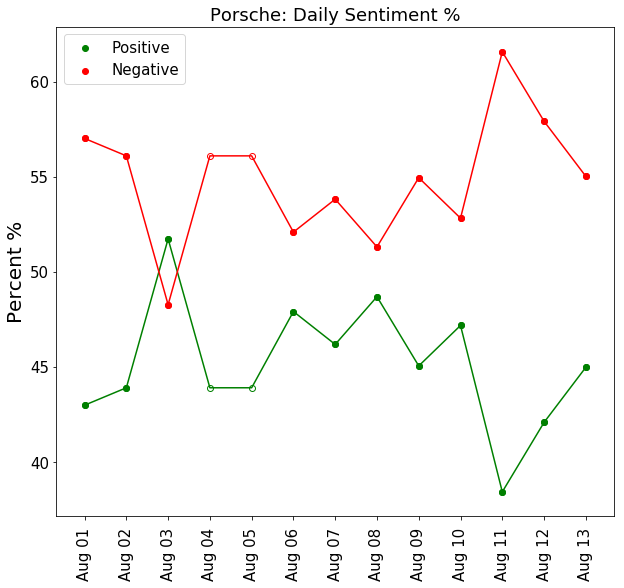


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  1.2547850643238154

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  1.7043189368770764

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  1.3255208333333333

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  1.1785714285714286

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND cre

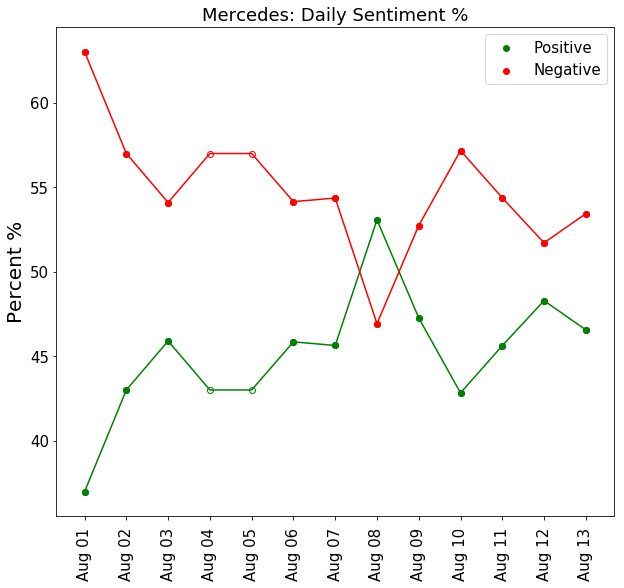


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  1.3758542141230068

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  1.1851851851851851

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  1.5112016293279023

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  1.2491694352159468

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
A

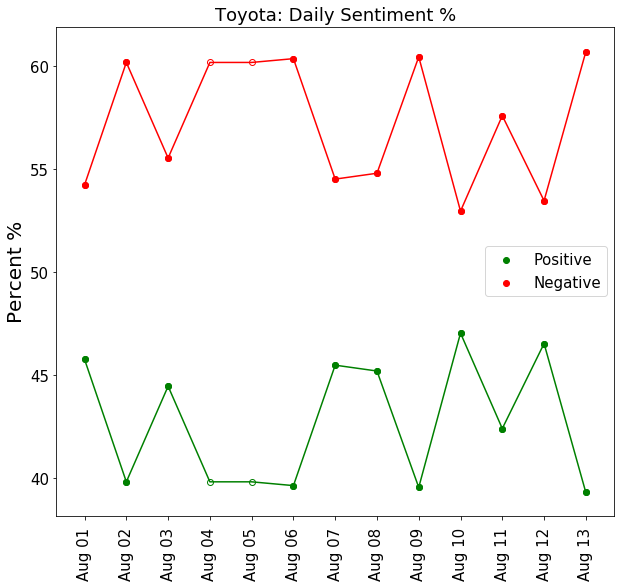


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  1.9532551097653292

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  2.274340527577938

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  2.254791431792559

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after r

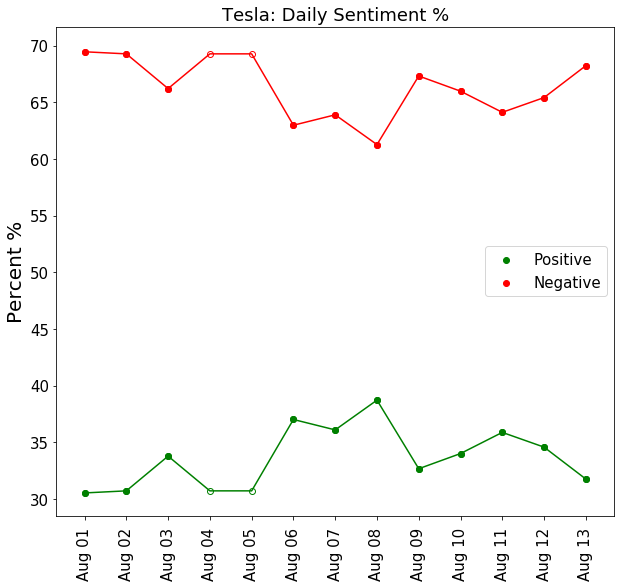


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.8824322502359444

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.8303693570451436

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.9734177215189873

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplic

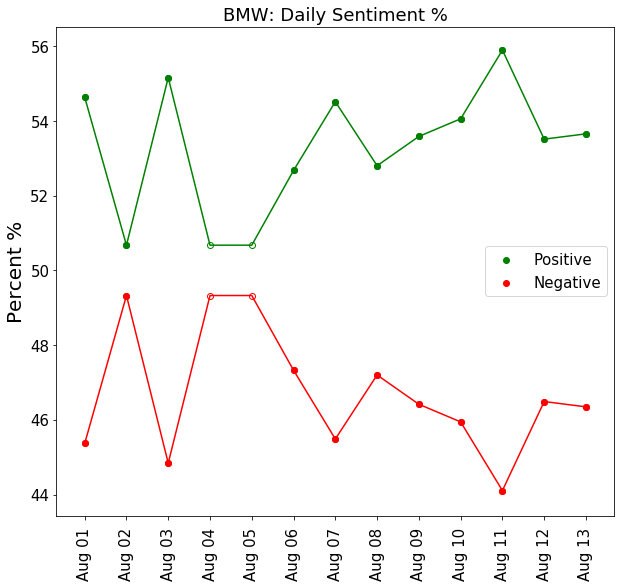


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  1.2666666666666666

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  1.3265306122448979

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

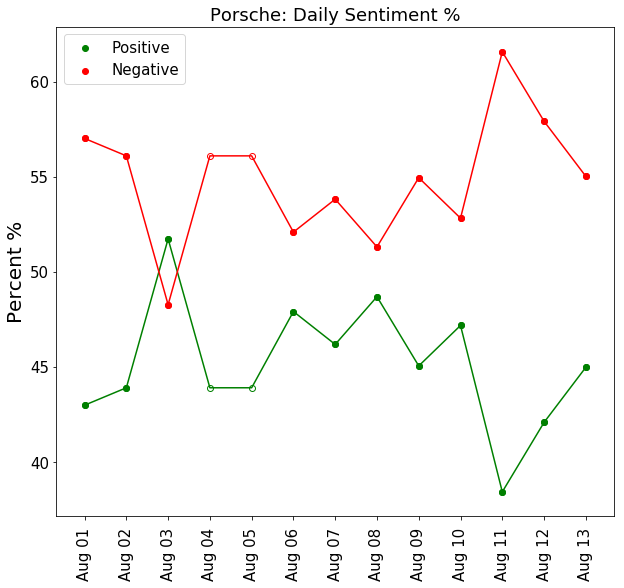


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.7462075911122301

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT 



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.7181153533712429

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.737403928266439

SELECT * FROM tweet
WHERE LOWER

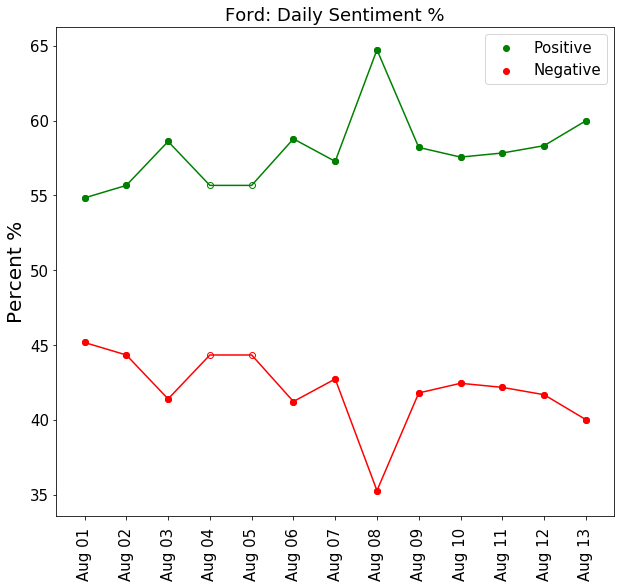


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  1.1970851275256706

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  1.2384615384615385

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

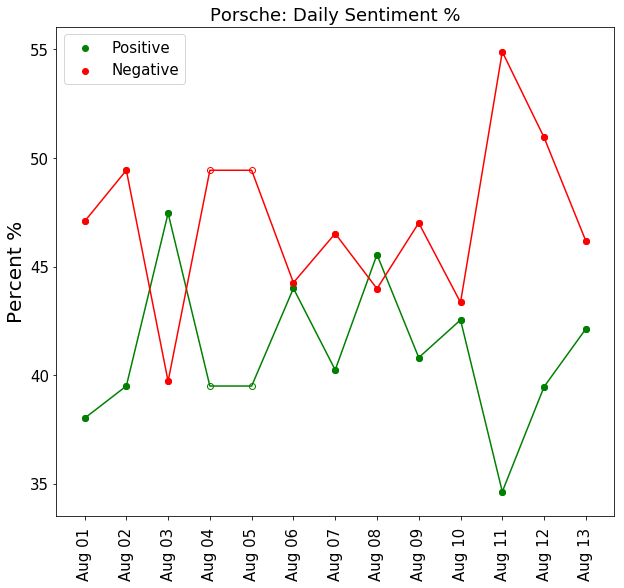


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  1.1950017599436817

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  1.728301886792453

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  1.222543352601156

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  1.22007722007722

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created

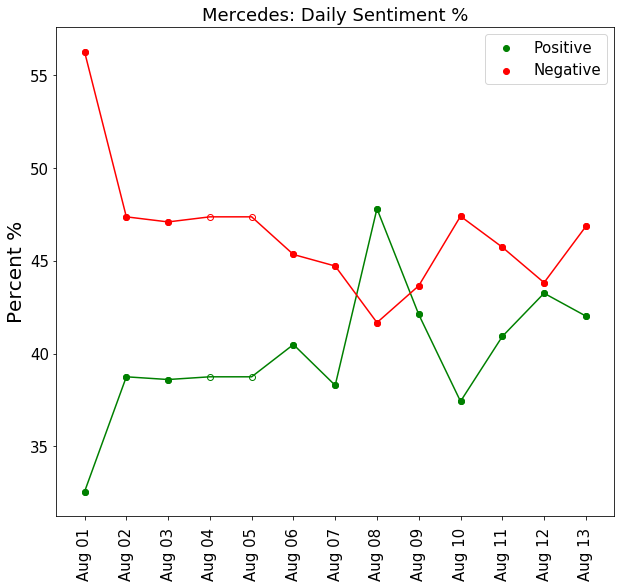


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  1.3184647302904564

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  1.2153846153846153

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  1.562043795620438

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  1.256

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at 

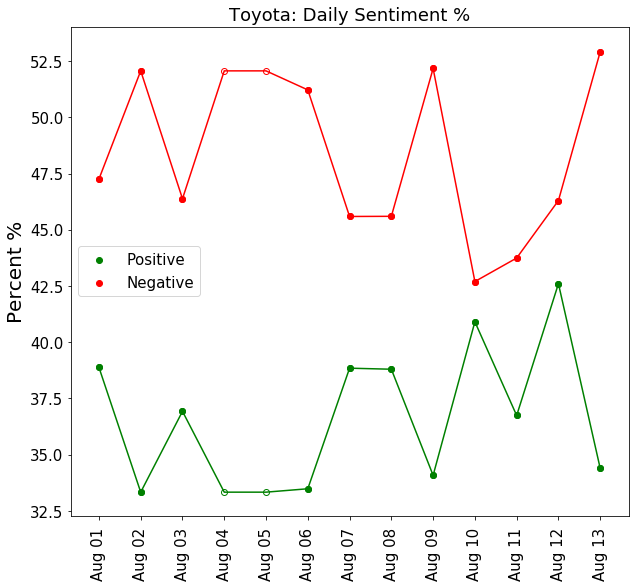


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  1.9459924074206718

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  2.3245425188374598

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  2.238305941845765

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after 

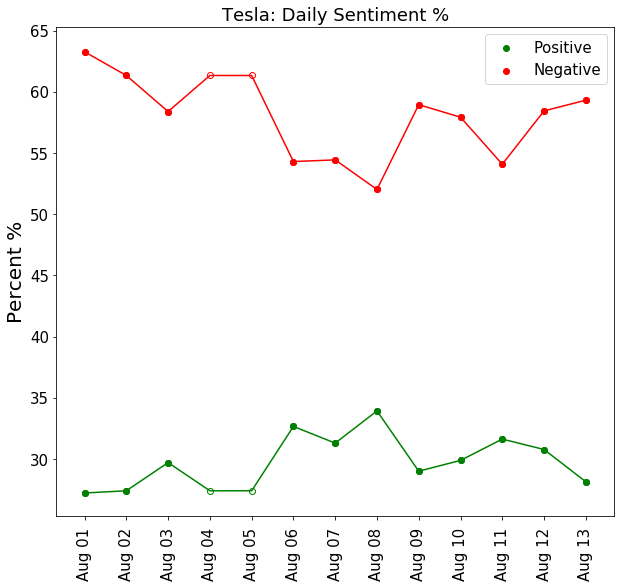


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.8084420567920184

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.7884914463452566

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.9183673469387755

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplic

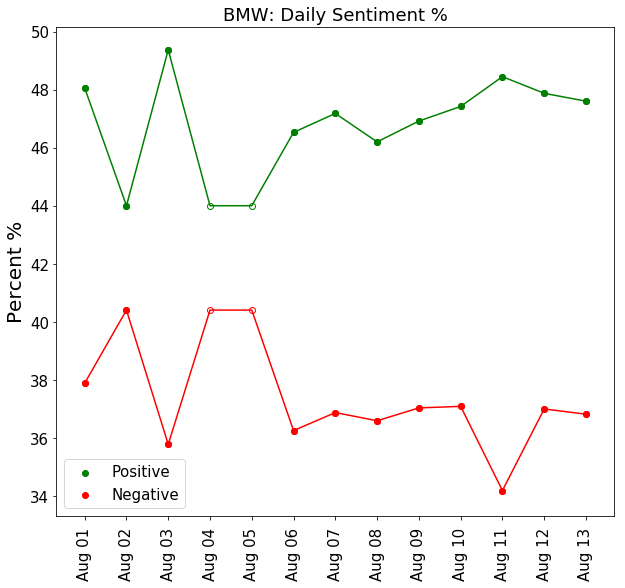


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  1.1970851275256706

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  1.2384615384615385

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

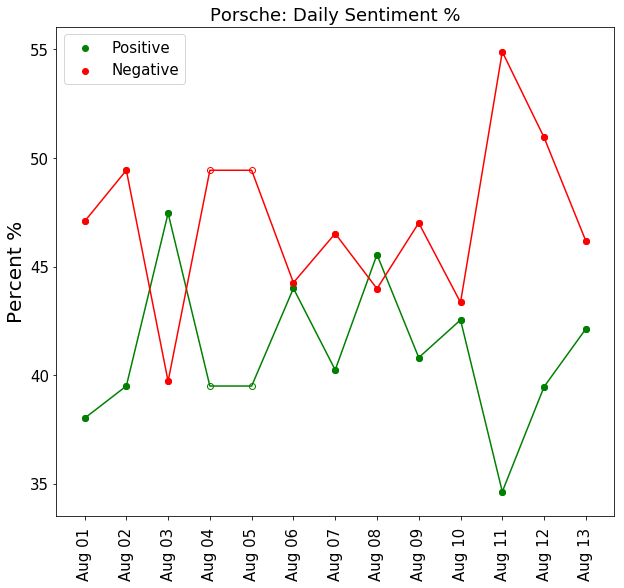


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.7023551610874275

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT 



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.6725865209471766

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.6999522216913521

SELECT * FROM tweet
WHERE LOWE

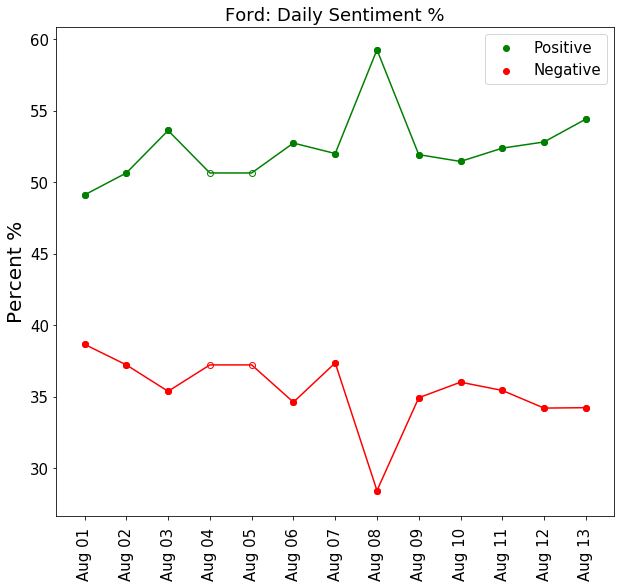


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  1.2286911970190963

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  1.5225806451612902

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

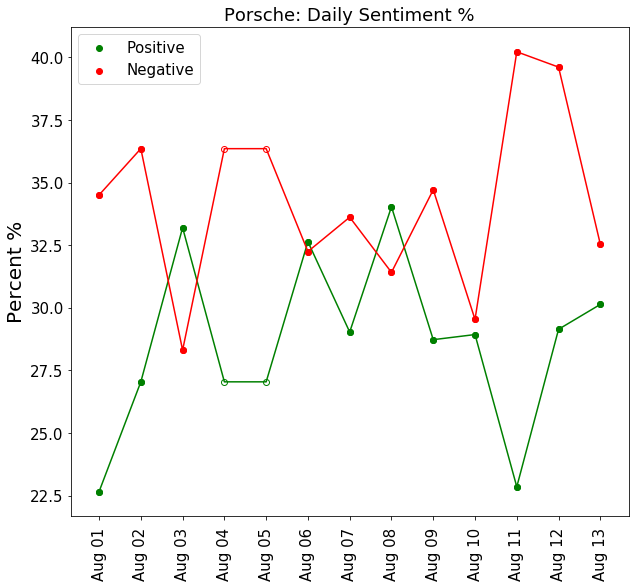


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  1.1712431352970545

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  1.7955801104972375

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  1.184

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  1.2473118279569892

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE 

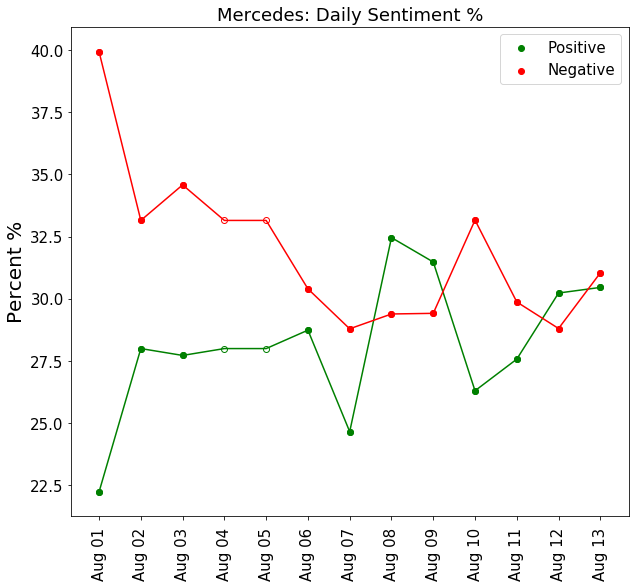


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  1.1301859799713876

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  1.1060070671378093

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  1.0445859872611465

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  1.1235955056179776

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
A

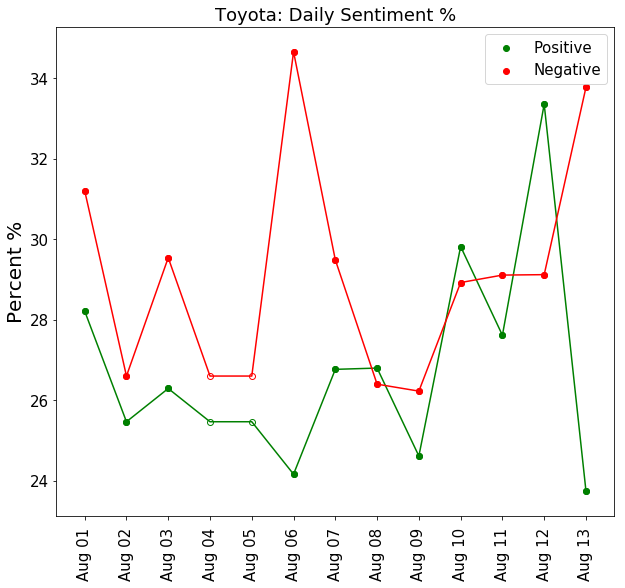


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  2.0444820380137325

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  2.4813218390804597

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  2.339225589225589

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after 

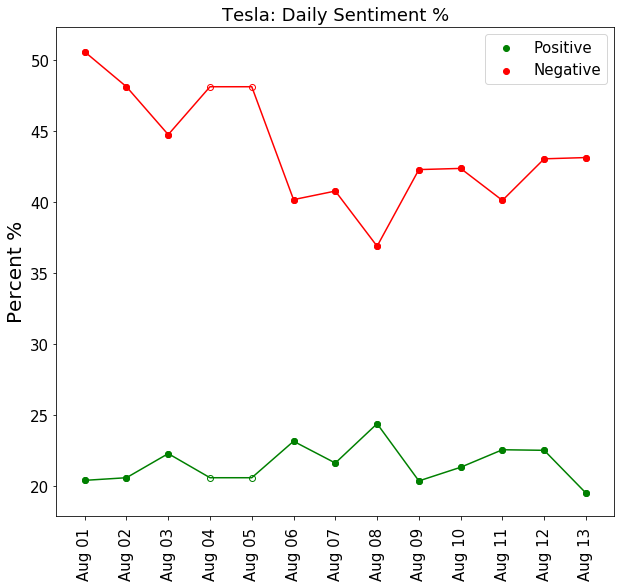


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.8015210991167812

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.77

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  1.0049382716049382

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  950 

F

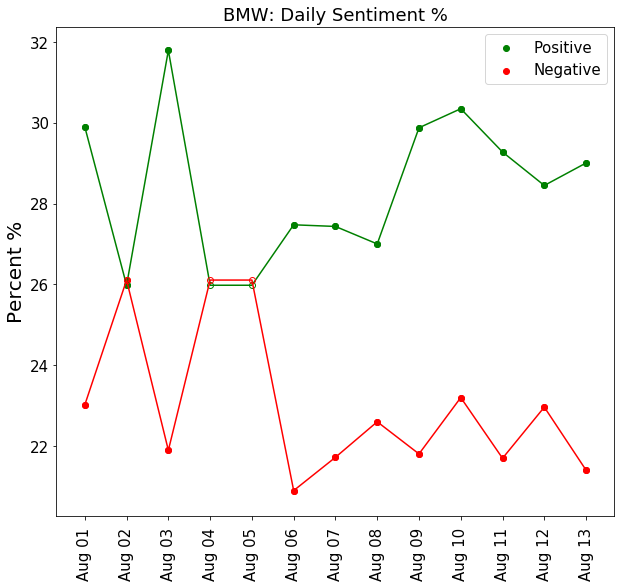


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  1.2286911970190963

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  1.5225806451612902

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

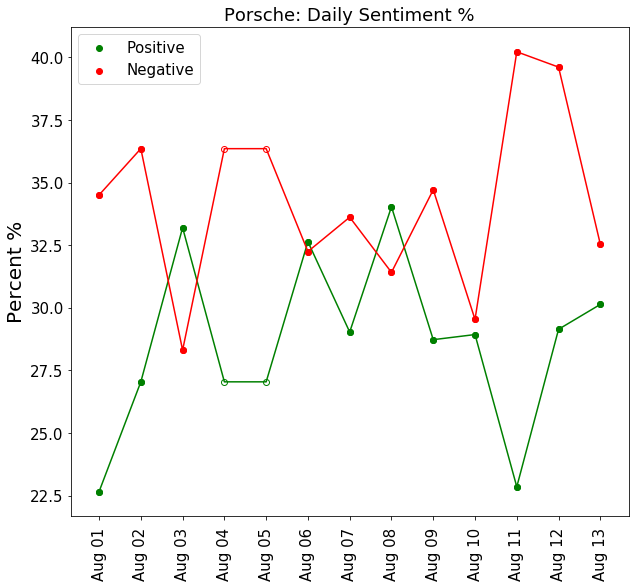


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.7050213915784733

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT 



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.643928035982009

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.7154150197628458

SELECT * FROM tweet
WHERE LOWER

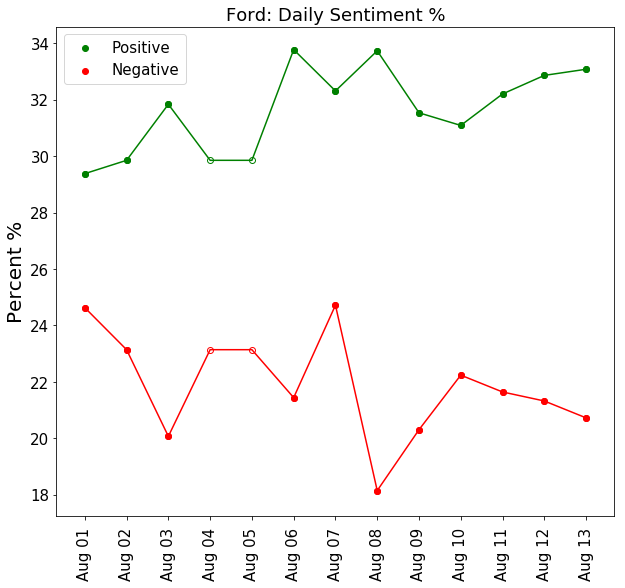


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  1.1264591439688716

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  1.3925233644859814

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

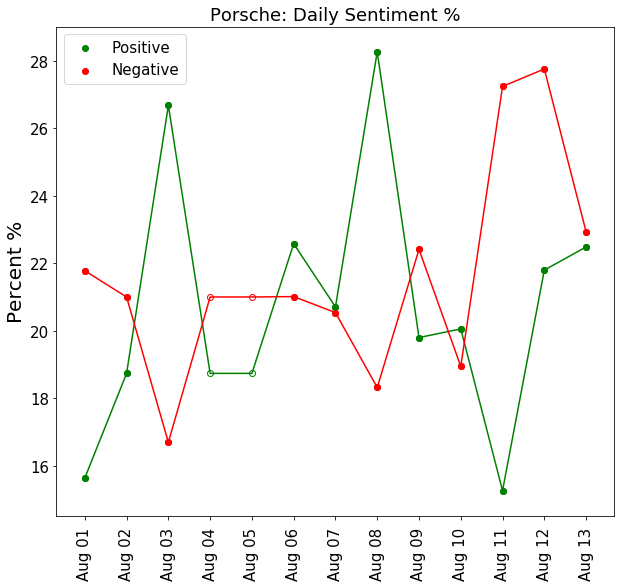


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  1.0425992779783393

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  1.6974789915966386

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  1.0813953488372092

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  1.2682926829268293

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND cre

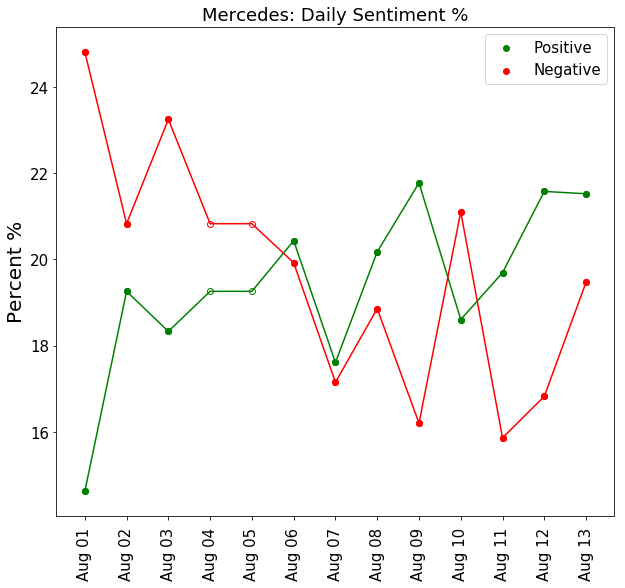


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  0.8433157642549114

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  0.7123287671232876

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  0.7866108786610879

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  0.7338709677419355

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
A

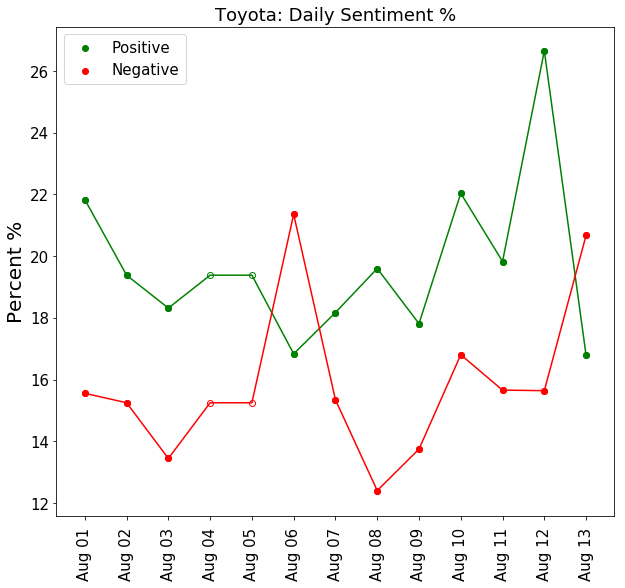


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  1.992583975570743

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  2.380157170923379

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  2.2833723653395785

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after r

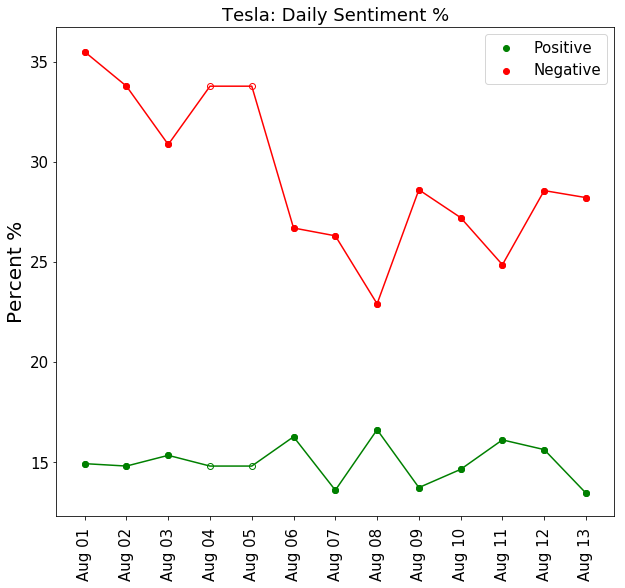


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.6785580172737514

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.70703125

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.9190283400809717

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  9

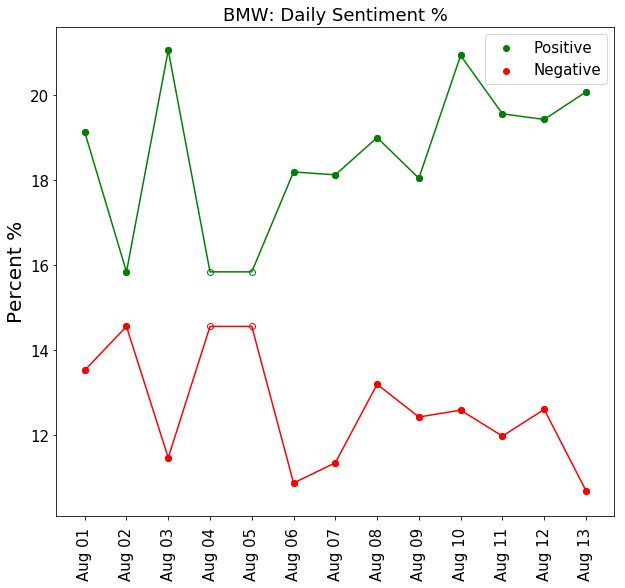


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  1.1264591439688716

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  1.3925233644859814

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

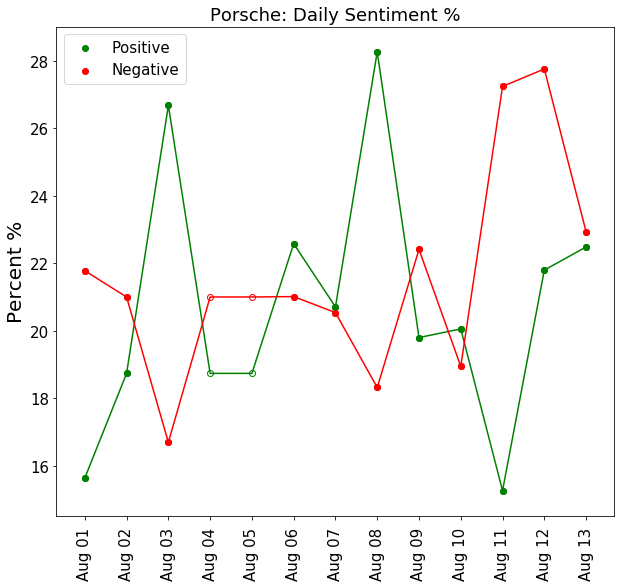


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.6562386980108499

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT 



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.5662949194547707

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.6658097686375322

SELECT * FROM tweet
WHERE LOWE

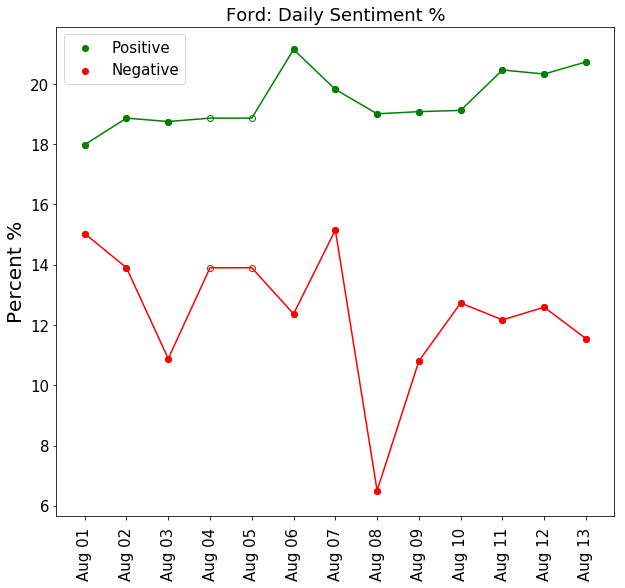


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.9380053908355795

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  1.2857142857142858

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

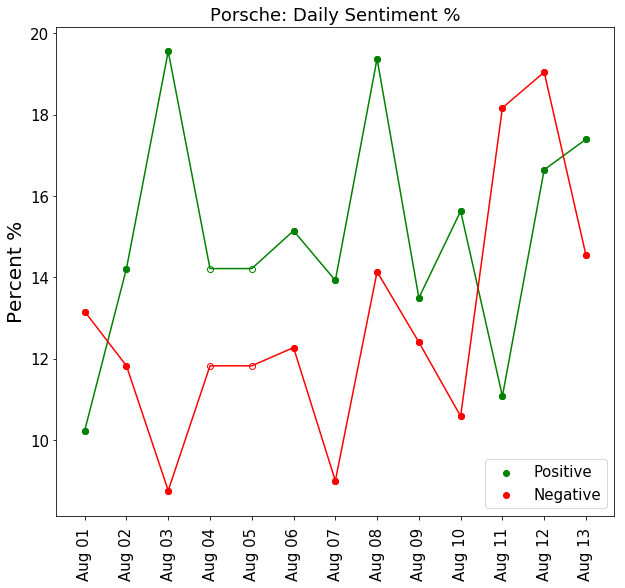


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  0.8245067497403946

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  1.3258426966292134

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  0.9831932773109243

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  1.0617283950617284

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND cre

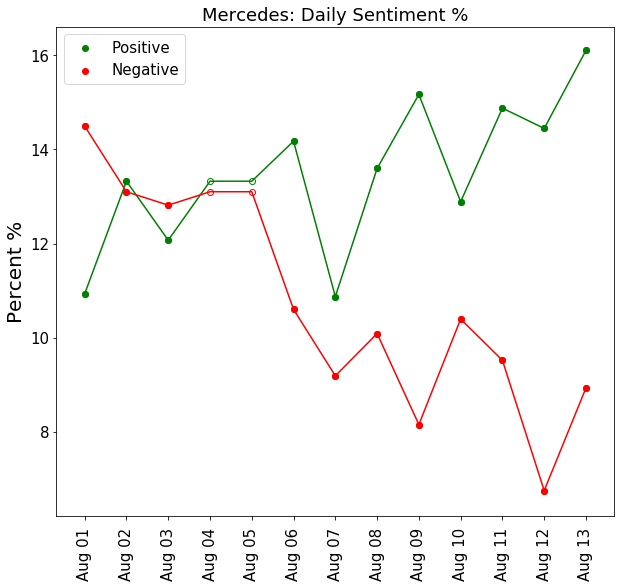


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  0.5141935483870967

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  0.5855263157894737

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  0.5170454545454546

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  0.4878048780487805

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
A

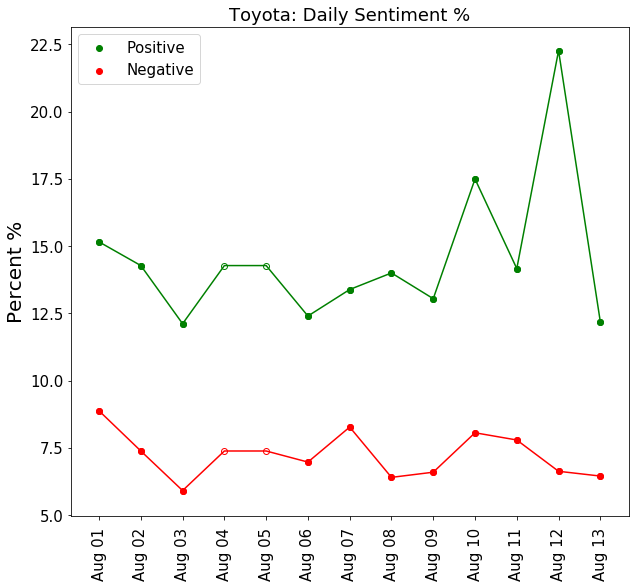


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  1.6566106499291355

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  2.0092105263157896

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  1.8511627906976744

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after

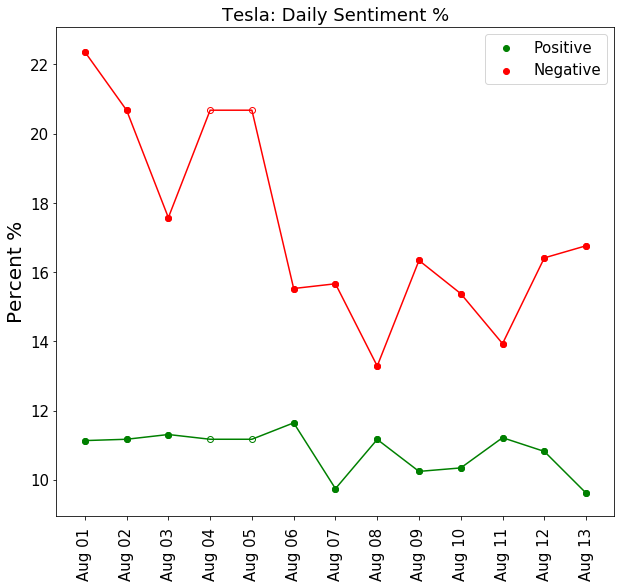


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.5220862160723789

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.5164835164835165

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.7192982456140351

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplic

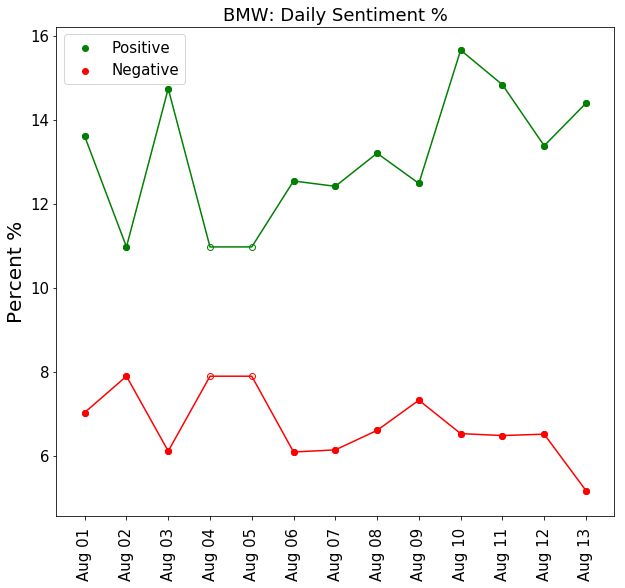


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.9380053908355795

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  1.2857142857142858

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

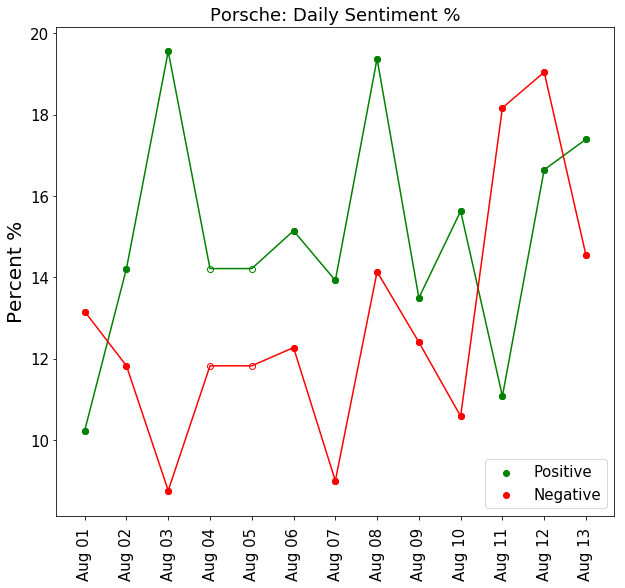


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.5381658429434377

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT 



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.44935543278084716

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.5227272727272727

SELECT * FROM tweet
WHERE LOW

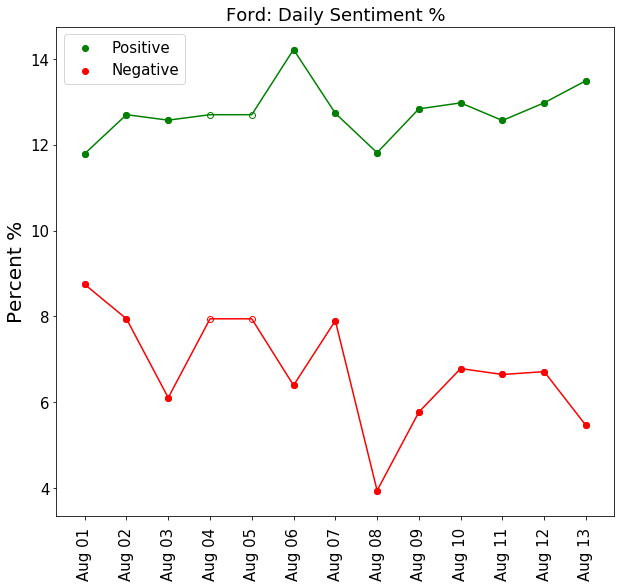


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.682896379525593

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.92

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%po

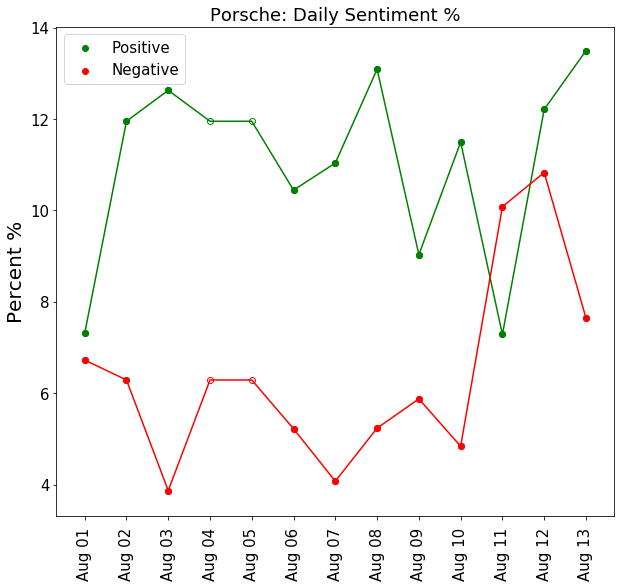


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  0.5516717325227963

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  0.6779661016949152

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  0.625

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  0.8113207547169812

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE 

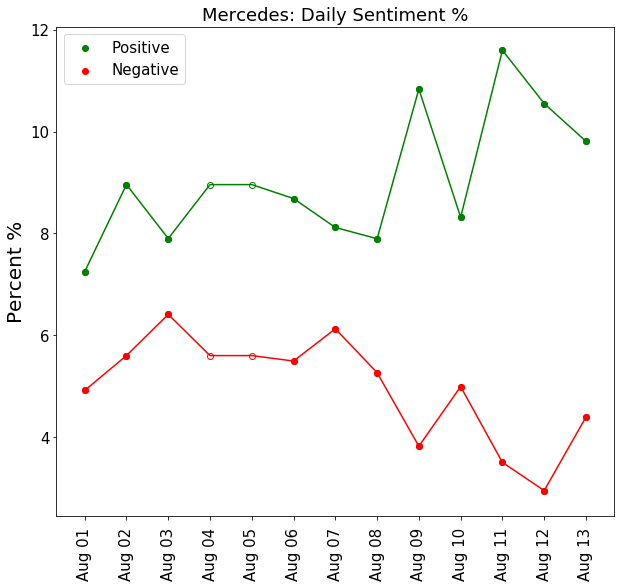


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  0.3404059040590406

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  0.4368932038834951

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  0.4247787610619469

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  0.2807017543859649

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
A

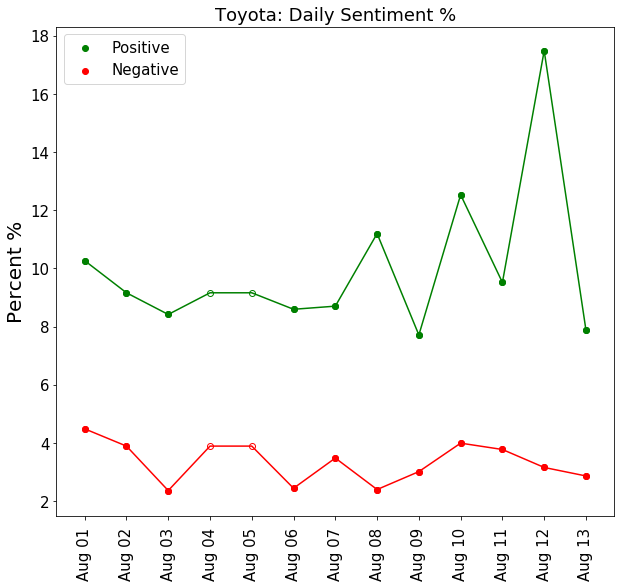


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  1.198391420911528

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  1.3527204502814258

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  1.3209302325581396

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after 

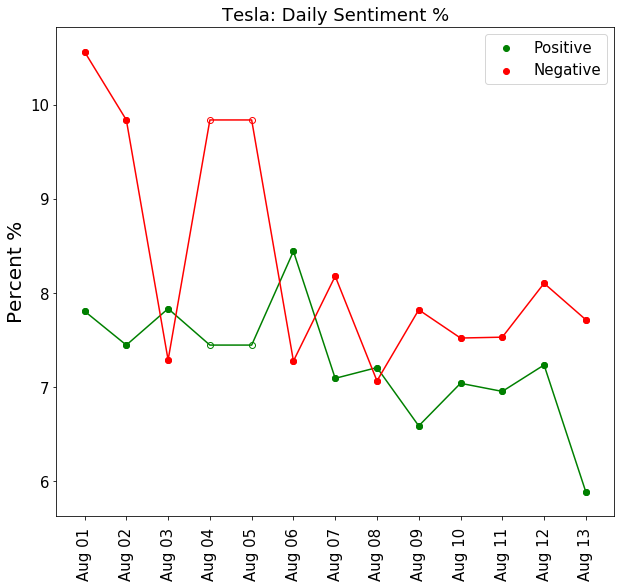


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.4242671009771987

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.39166666666666666

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.6428571428571429

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing dupli

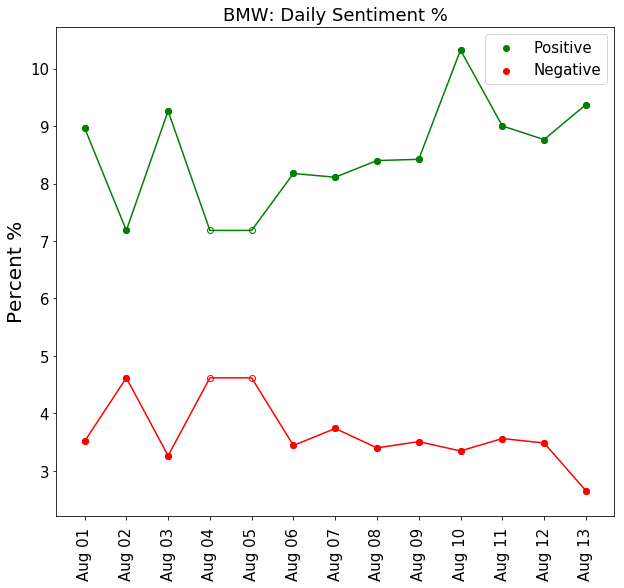


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.682896379525593

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.92

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%po

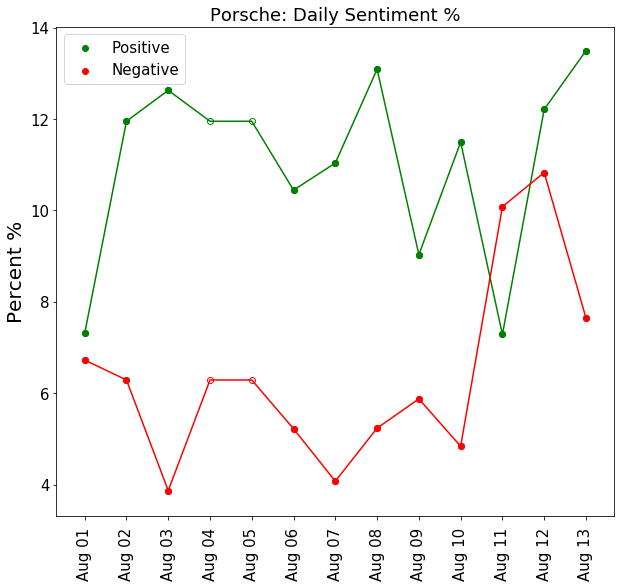


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.4424853064651553

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT 



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.39156626506024095

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.4176470588235294

SELECT * FROM tweet
WHERE LOW

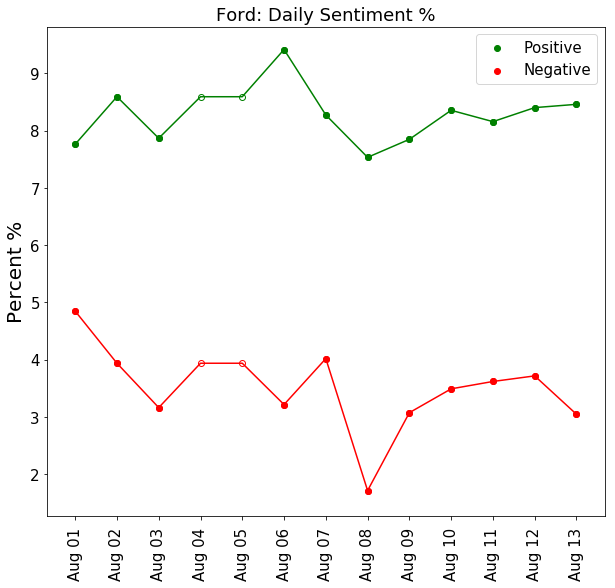


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.4198895027624309

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.5769230769230769

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

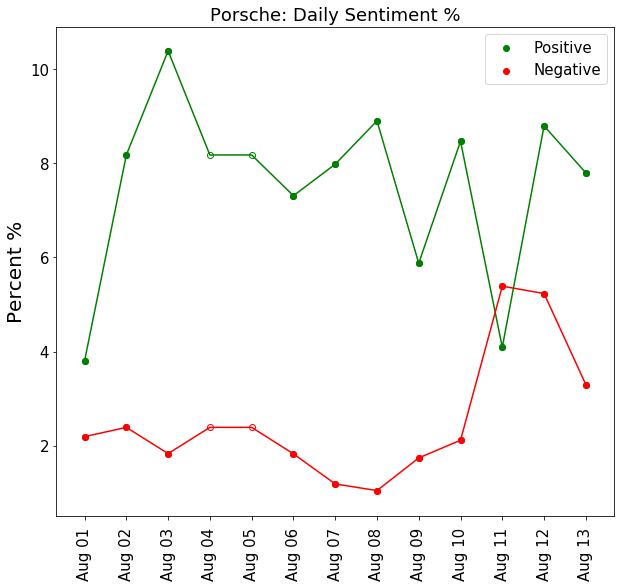


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  0.31627906976744186

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  0.5806451612903226

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  0.37777777777777777

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  0.6206896551724138

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND c

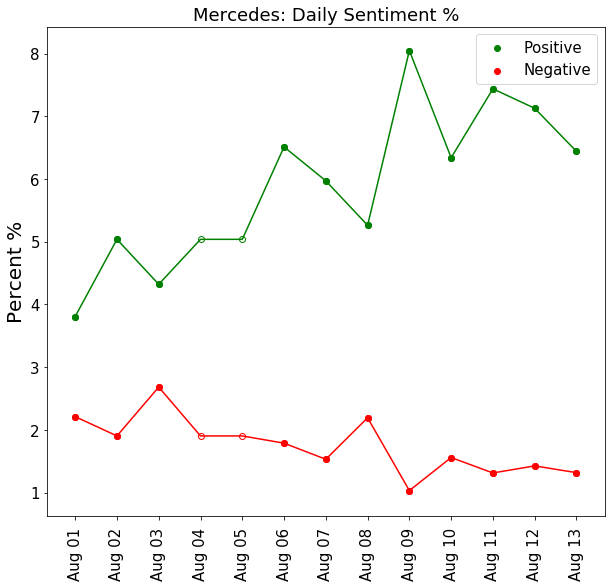


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  0.2002534854245881

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  0.27692307692307694

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  0.2972972972972973

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  0.06666666666666667

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  

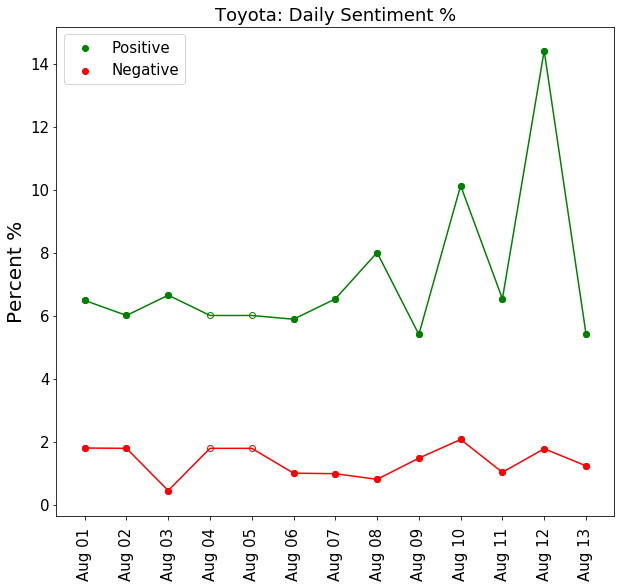


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  0.8359493670886076

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  0.896875

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  0.8438661710037175

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing 

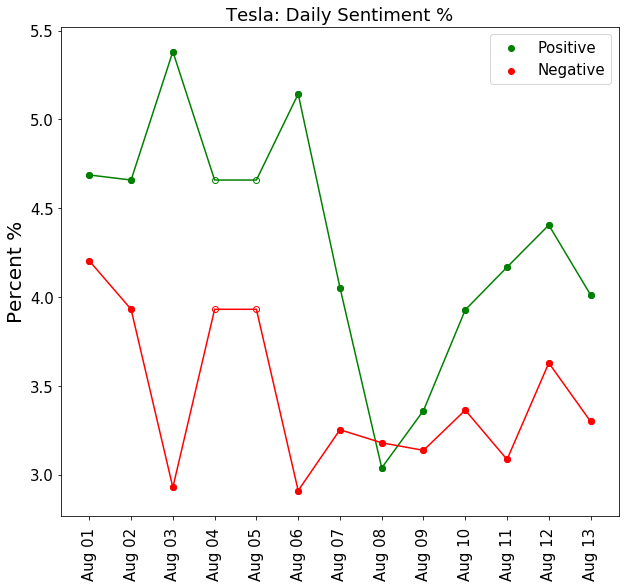


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.31090174966352624

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.25

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.5652173913043478

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  950 



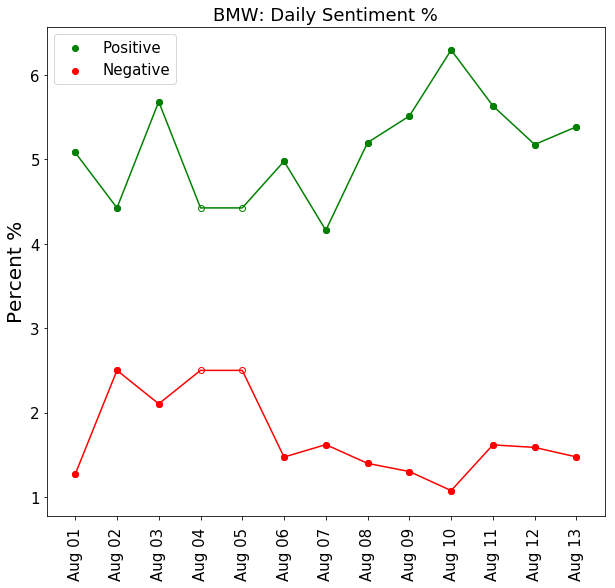


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.4198895027624309

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.5769230769230769

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

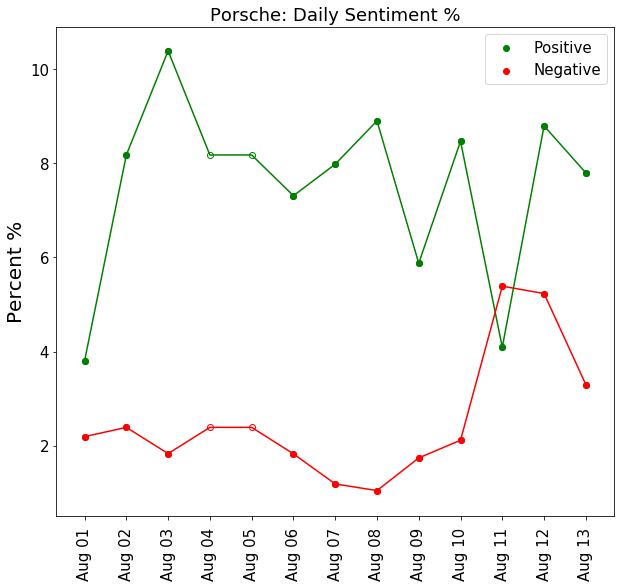


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.32950708980418636

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.28110599078341014

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.32663316582914576

SELECT * FROM tweet
WHERE LO

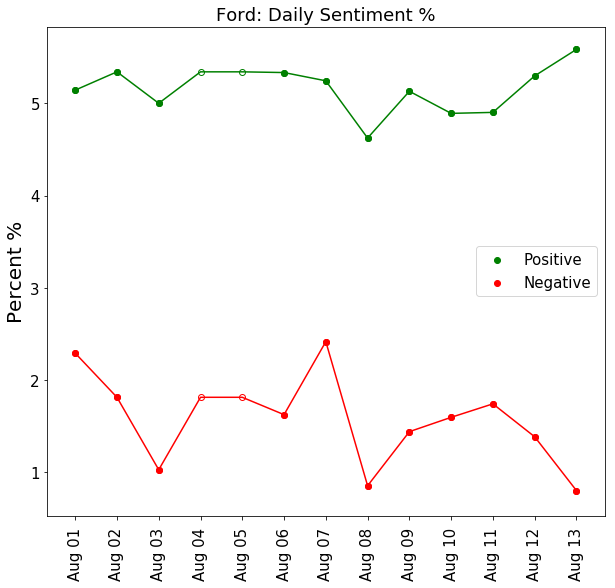


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.2052980132450331

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.3333333333333333

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

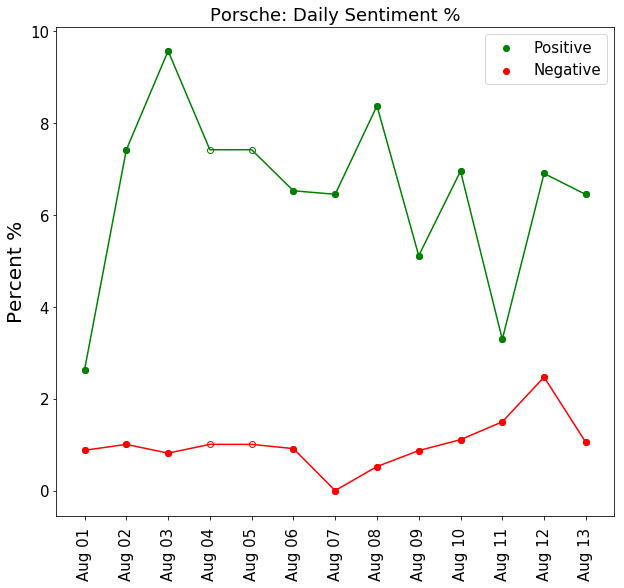


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  0.15804597701149425

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  0.24

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  0.25

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  0.3076923076923077

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 04 %' 
 

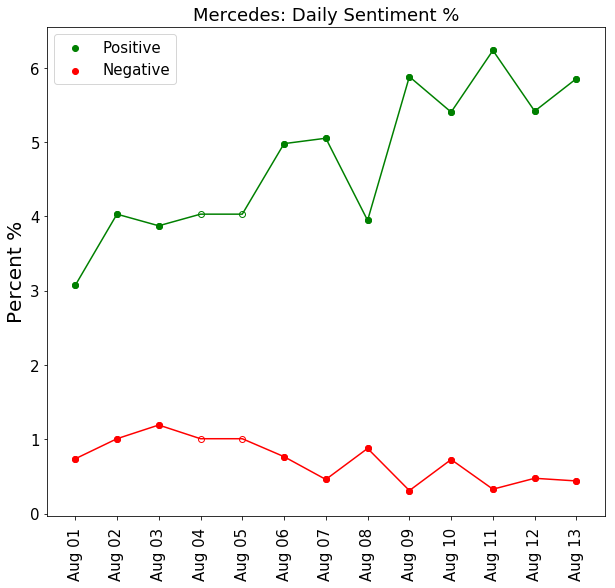


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  0.11290322580645161

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  0.21153846153846154

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  0.12903225806451613

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  0.02702702702702703

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'

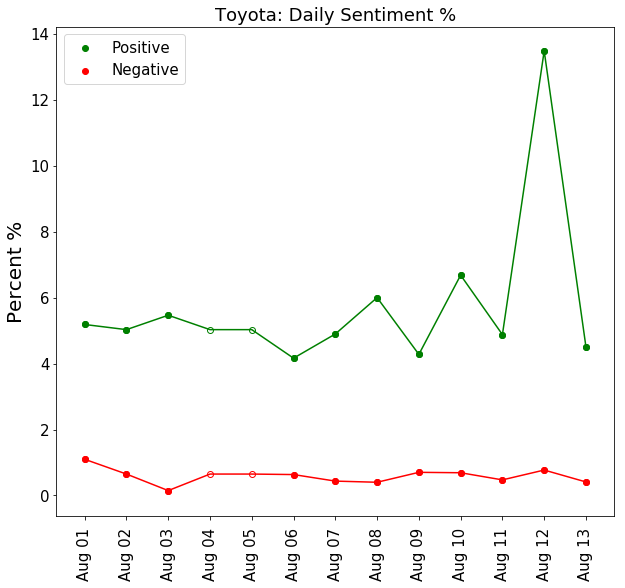


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  0.421087098886706

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  0.4219409282700422

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  0.49038461538461536

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after

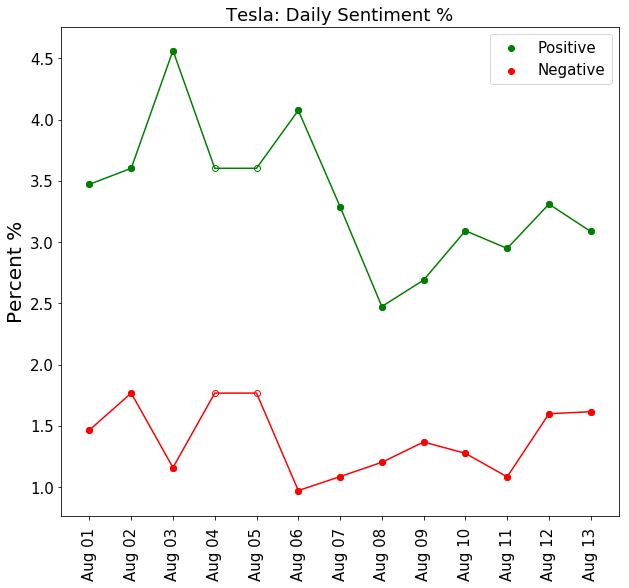


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.15292096219931273

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.08333333333333333

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.3114754098360656

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing dupl

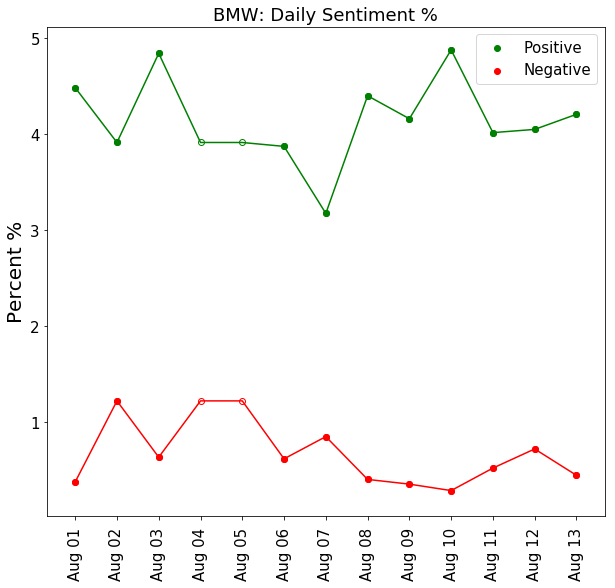


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.2052980132450331

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.3333333333333333

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text

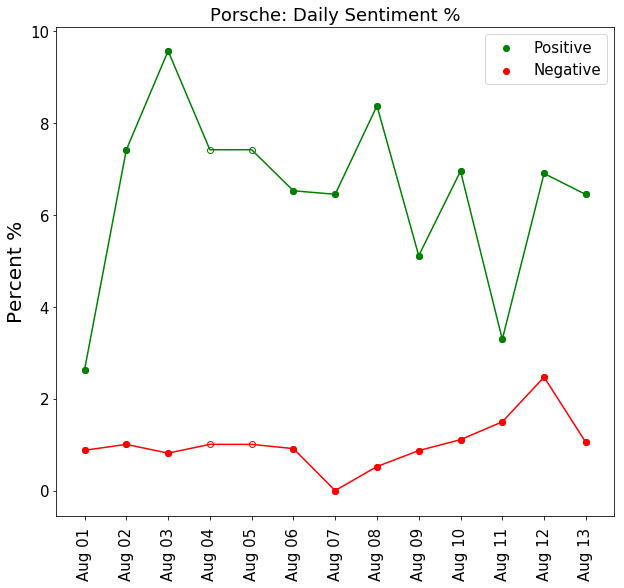


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.20593368237347295

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.17159763313609466

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.22448979591836735

SELECT * FROM tweet
WHERE LO

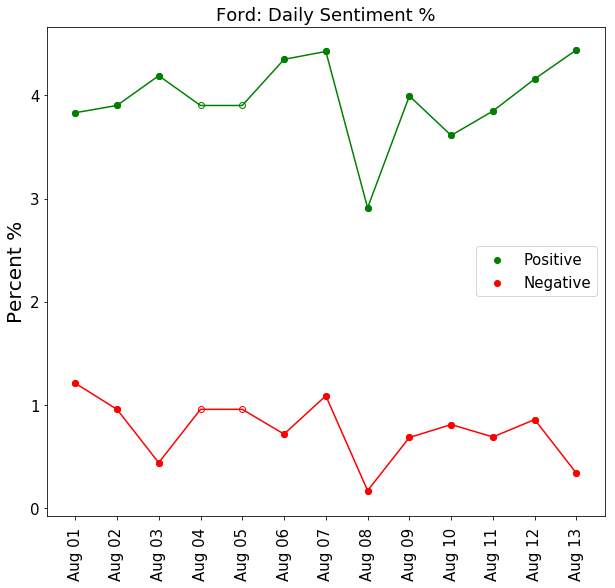


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.11046511627906977

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.14285714285714285

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_te

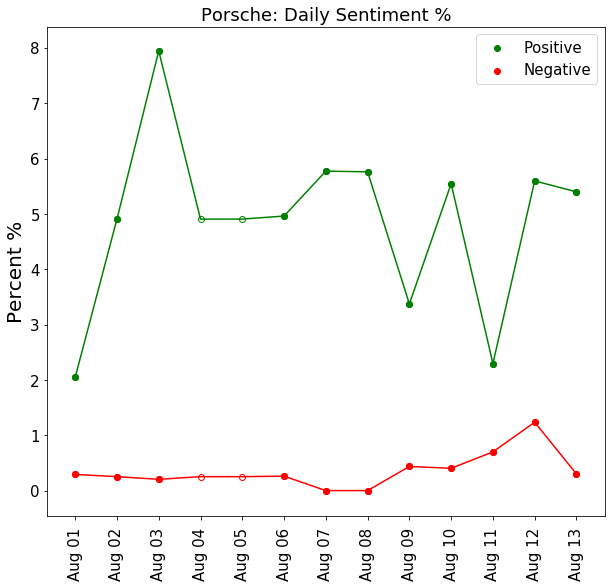


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  0.10486891385767791

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  0.11764705882352941

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  0.0

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  0.2777777777777778

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE 

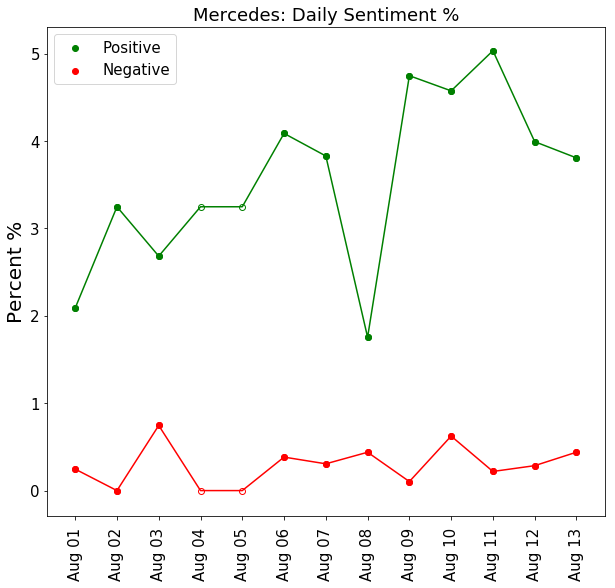


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  0.0899581589958159

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  0.2222222222222222

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  0.13953488372093023

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  0.0

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at 

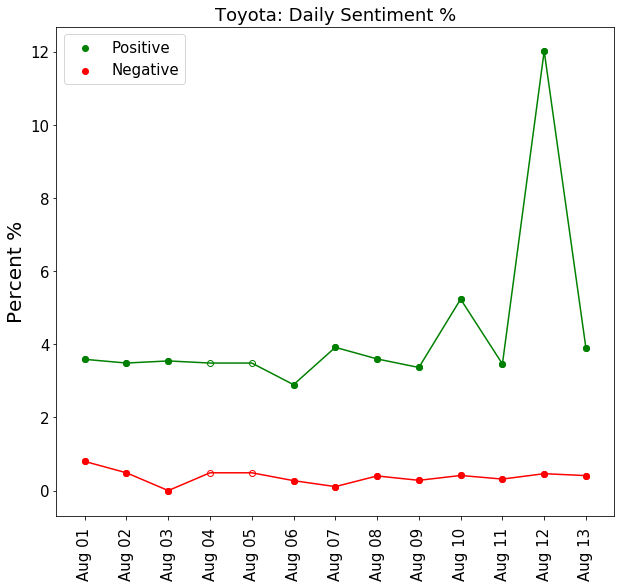


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  0.3091076356945722

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  0.2737430167597765

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  0.375886524822695

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after 

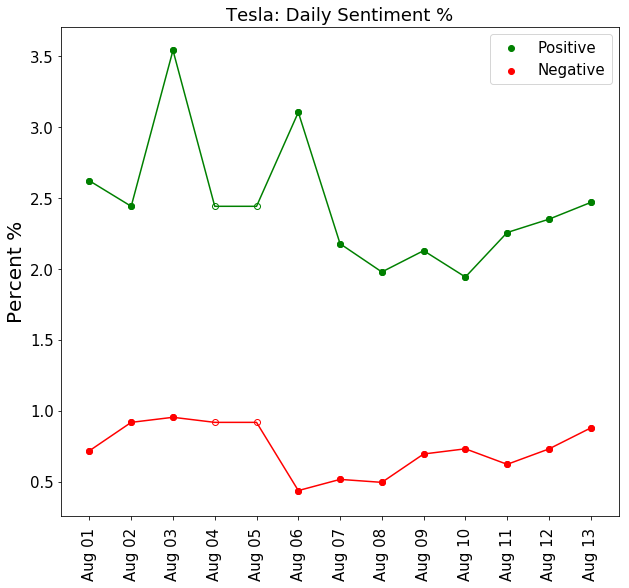


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.116331096196868

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.09302325581395349

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.17777777777777778

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing dupli

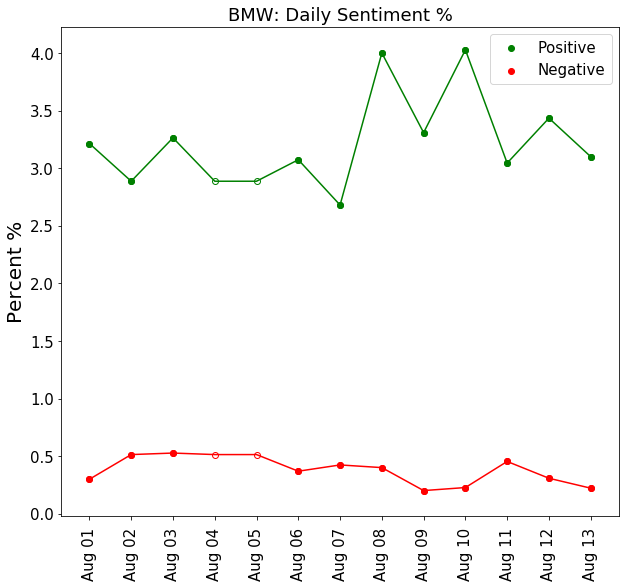


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.11046511627906977

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.14285714285714285

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_te

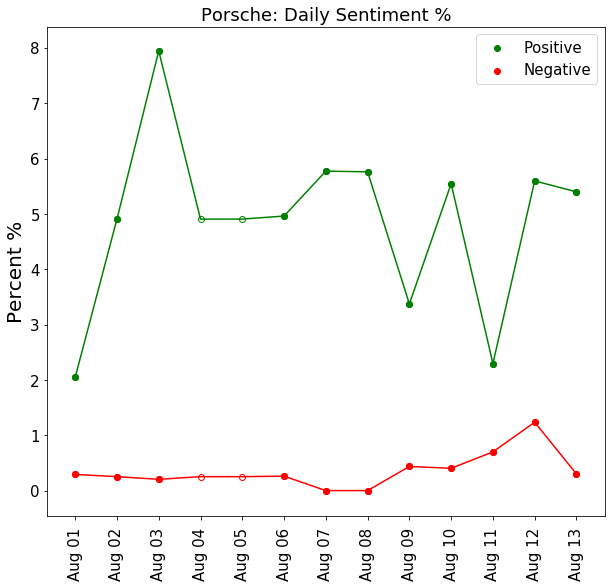


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.19662243667068757

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.13709677419354838

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.25252525252525254

SELECT * FROM tweet
WHERE LO

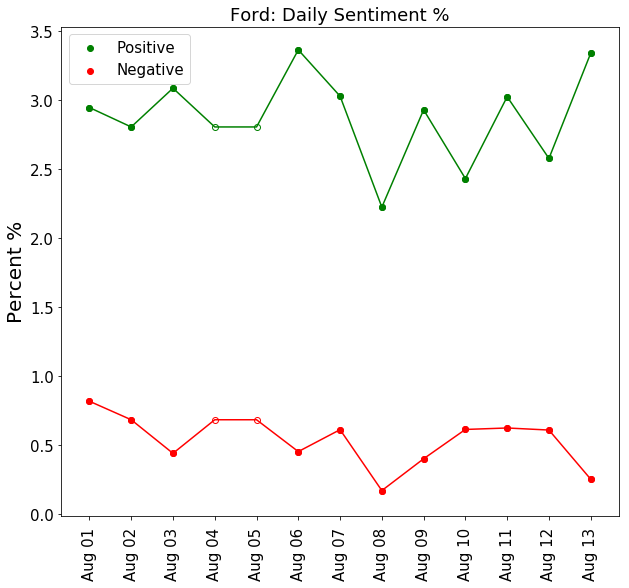


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.12295081967213115

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.0

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%p

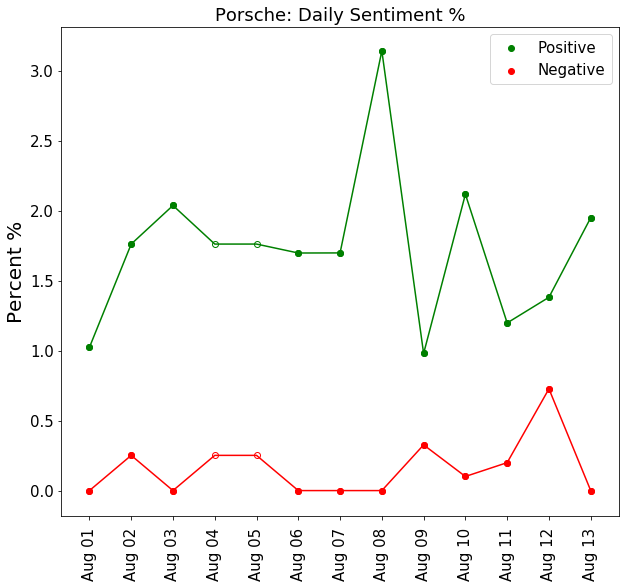


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  0.07751937984496124

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  0.16666666666666666

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  0.0

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  0.07142857142857142

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE

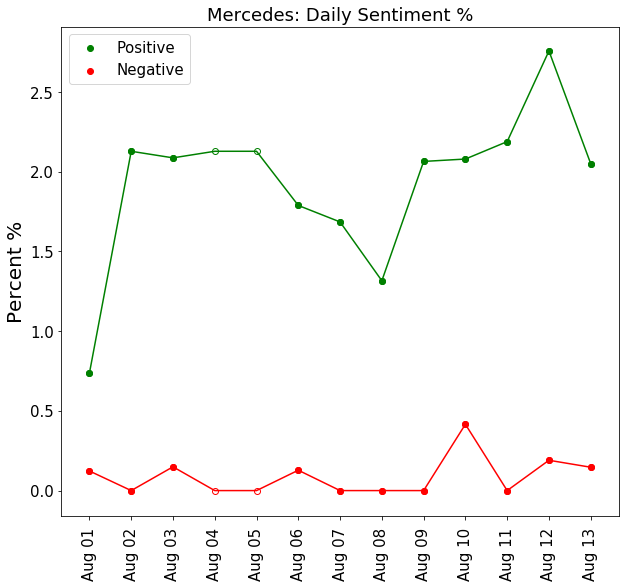


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  0.1206896551724138

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  0.4444444444444444

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  0.08333333333333333

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  0.0

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at 

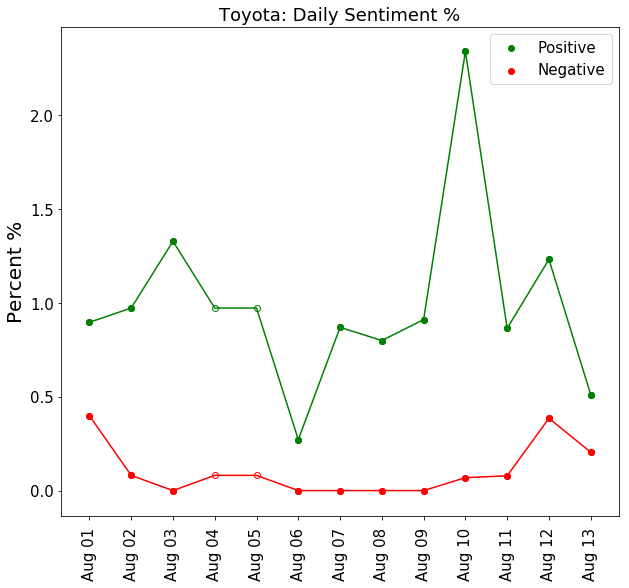


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  0.40049751243781095

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  0.31746031746031744

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  0.46551724137931033

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets af

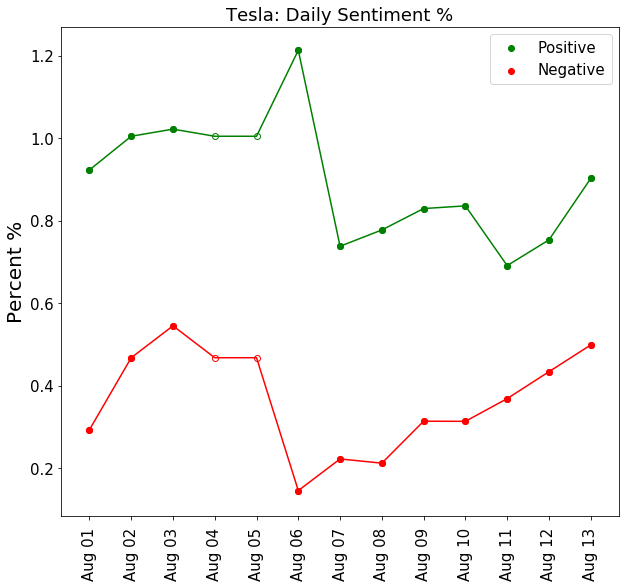


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.1276595744680851

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.058823529411764705

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.15

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  950 


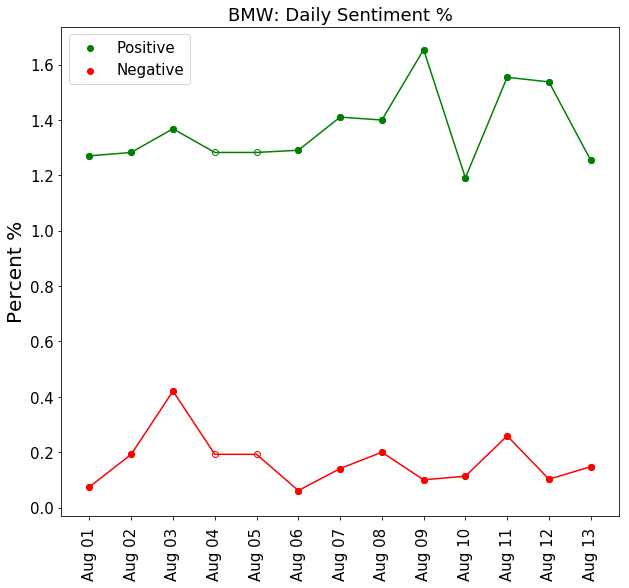


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.12295081967213115

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.0

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%p

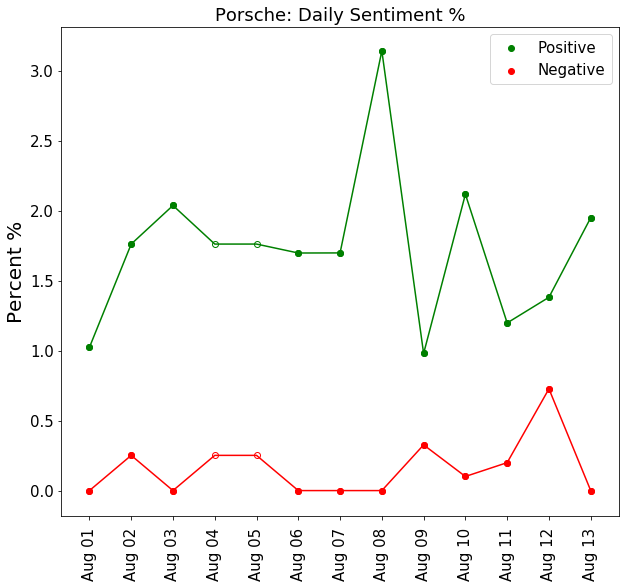


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.18840579710144928

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.13333333333333333

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.17647058823529413

SELECT * FROM tweet
WHERE LO

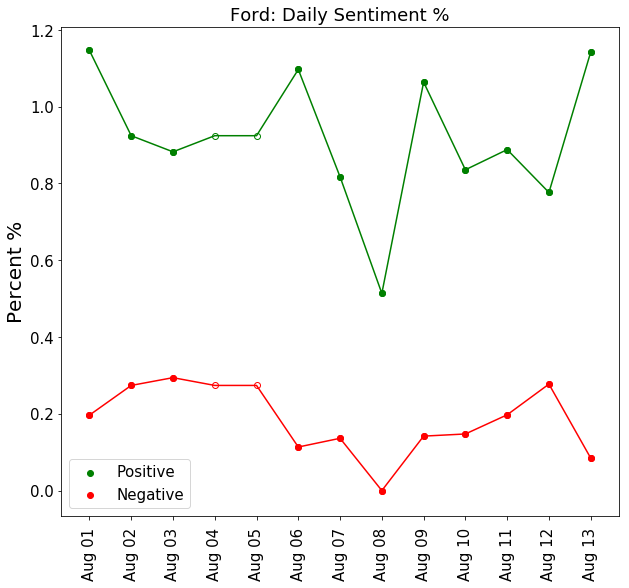


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.11650485436893204

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.0

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%p

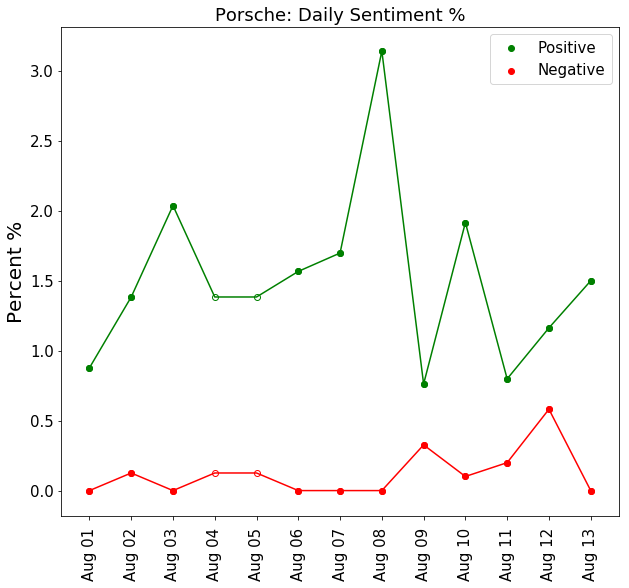


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7186 

Fraction removed:  0.677
Total Sample:  7186
Neg/Pos ratio:  0.0660377358490566

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  814 

Fraction removed:  0.567
Total Sample:  814
Neg/Pos ratio:  0.2

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  893 

Fraction removed:  0.553
Total Sample:  893
Neg/Pos ratio:  0.0

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  671 

Fraction removed:  0.461
Total Sample:  671
Neg/Pos ratio:  0.07692307692307693

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%mercedes%'
AND created_at LIKE '%Aug 04 %' 
 



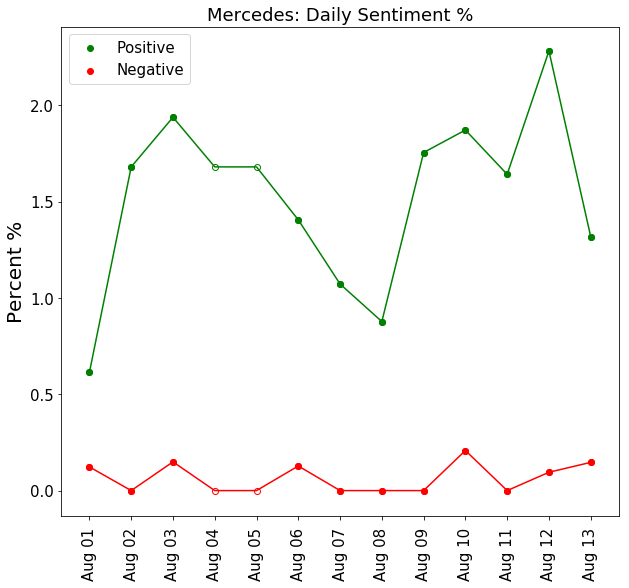


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  10430 

Fraction removed:  0.523
Total Sample:  10430
Neg/Pos ratio:  0.12380952380952381

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1003 

Fraction removed:  0.515
Total Sample:  1003
Neg/Pos ratio:  0.375

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1233 

Fraction removed:  0.486
Total Sample:  1233
Neg/Pos ratio:  0.1111111111111111

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing duplicates:  677 

Fraction removed:  0.531
Total Sample:  677
Neg/Pos ratio:  0.0

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%toyota%'  
AND created_at LIKE '%Aug 04

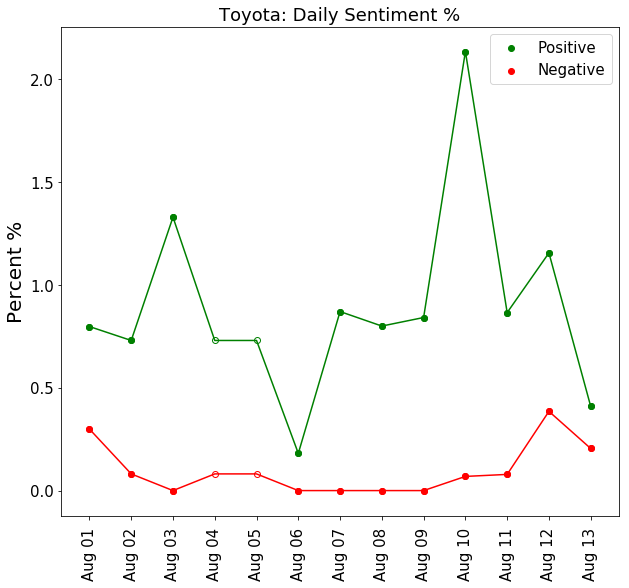


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  46815 

Fraction removed:  0.704
Total Sample:  46815
Neg/Pos ratio:  0.36716417910447763

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  6827 

Fraction removed:  0.721
Total Sample:  6827
Neg/Pos ratio:  0.3076923076923077

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  5774 

Fraction removed:  0.698
Total Sample:  5774
Neg/Pos ratio:  0.4666666666666667

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%tesla%'
AND LOWER(tweet_text) NOT LIKE '%solar roof%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets afte

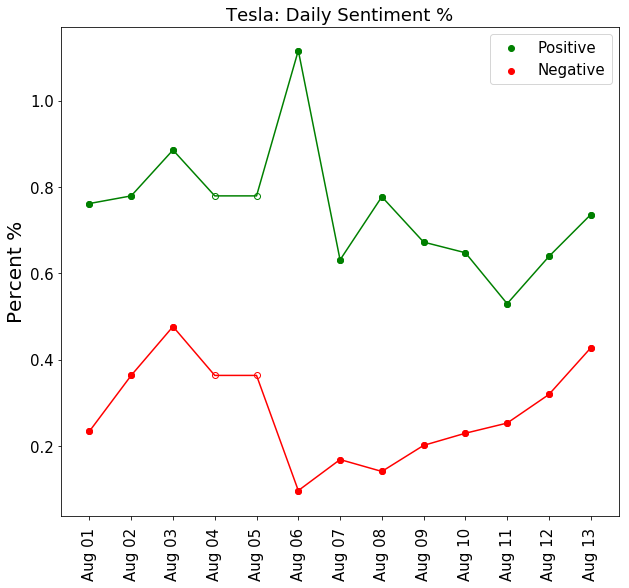


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  13962 

Fraction removed:  0.676
Total Sample:  13962
Neg/Pos ratio:  0.13496932515337423

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  1338 

Fraction removed:  0.542
Total Sample:  1338
Neg/Pos ratio:  0.058823529411764705

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 02 %' 
 


The number of tweets after removing duplicates:  1559 

Fraction removed:  0.517
Total Sample:  1559
Neg/Pos ratio:  0.11764705882352941

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%bmw%'  
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 03 %' 
 


The number of tweets after removing du

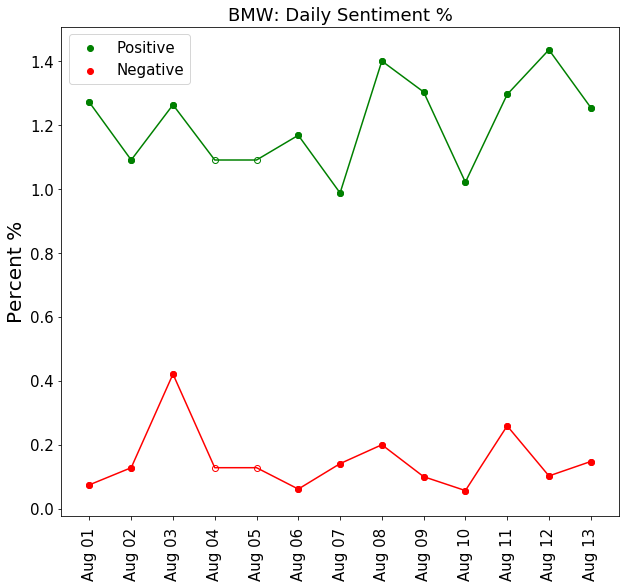


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  7514 

Fraction removed:  0.61
Total Sample:  7514
Neg/Pos ratio:  0.11650485436893204

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%police%'
AND created_at LIKE '%Aug 01 %' 
 


The number of tweets after removing duplicates:  684 

Fraction removed:  0.355
Total Sample:  684
Neg/Pos ratio:  0.0

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%porsche%'
AND LOWER(tweet_text) NOT LIKE '%davido%'
AND LOWER(tweet_text) NOT LIKE '%nuamah%'
AND LOWER(tweet_text) NOT LIKE '%actor%'
AND LOWER(tweet_text) NOT LIKE '%p

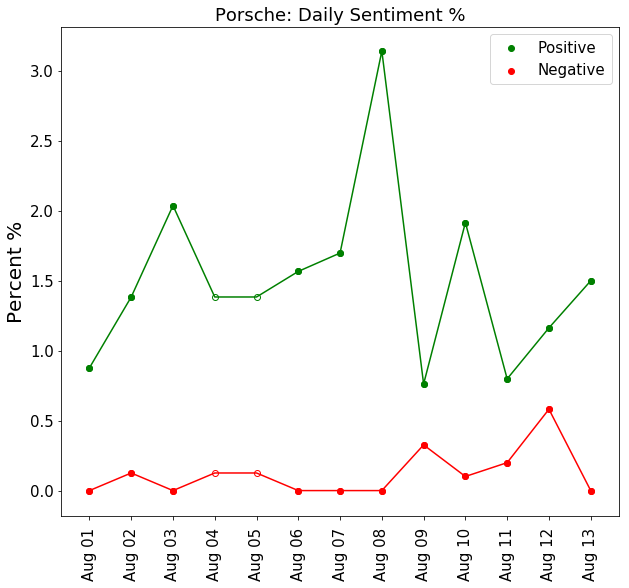


SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%' 
 


The number of tweets after removing duplicates:  27742 

Fraction removed:  0.508
Total Sample:  27742
Neg/Pos ratio:  0.1956521739130435

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT 



The number of tweets after removing duplicates:  4230 

Fraction removed:  0.5
Total Sample:  4230
Neg/Pos ratio:  0.1111111111111111

SELECT * FROM tweet
WHERE LOWER(tweet_text) LIKE '%ford%'
AND LOWER(tweet_text) NOT LIKE '%harrison%'  
AND LOWER(tweet_text) NOT LIKE '%vote%'  
AND LOWER(tweet_text) NOT LIKE '%doug%'
AND LOWER(tweet_text) NOT LIKE '%tom%'
AND LOWER(tweet_text) NOT LIKE '%henry%'
AND LOWER(tweet_text) NOT LIKE '%government%'
AND LOWER(tweet_text) NOT LIKE '%goverment%'
AND LOWER(tweet_text) NOT LIKE '%tax%'
AND LOWER(tweet_text) NOT LIKE '%toronto%'
AND LOWER(tweet_text) NOT LIKE '%democrats%'
AND LOWER(tweet_text) NOT LIKE '%ontario%'
AND LOWER(tweet_text) NOT LIKE '%fordnation%'
AND LOWER(tweet_text) NOT LIKE '%premier%'
AND LOWER(tweet_text) NOT LIKE '%melissa%'
AND created_at LIKE '%Aug 10 %' 
 


The number of tweets after removing duplicates:  4069 

Fraction removed:  0.405
Total Sample:  4069
Neg/Pos ratio:  0.21428571428571427

SELECT * FROM tweet
WHERE LOW

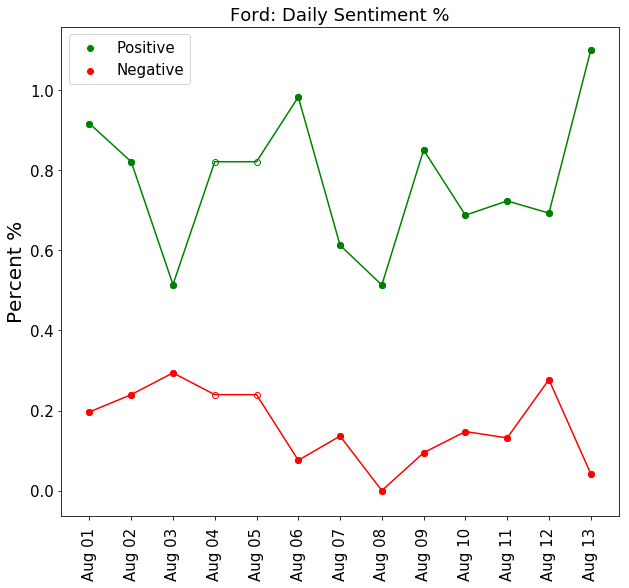

In [12]:
for threshold in thresholds:
    for car_company in car_companies:

        if(car_company=="Toyota"):
            q = q_toyota
        elif(car_company=="Ford"):
            q= q_ford
        elif(car_company=="Mercedes"):
            q=q_mercedes
        elif(car_company=="BMW"):
            q=q_bmw
        elif(car_company=="Porsche"):
            q=q_porsche
        elif(car_company=="Tesla"):
            q=q_tesla



        pos_sentiment = []
        neg_sentiment = []
        neutral_sentiment = []

        daily_total = []
        daily_neutral=[]
        daily_pos=[]
        daily_neg=[]


        # Loop over all dates that we are looking at
        for date in time_stamps:

            q_time = q+"AND created_at LIKE "+ date +" \n "

            print(q_time)

            df = pd.read_sql_query(q_time,conn)

            N_raw_tweets = len(df)

            percents = [-1.0,-1.0,-1.0]
            total_number = -1.0

            if(N_raw_tweets != 0):


                # Apply the 'Clean-up-text function to all tweets in the data frame'
                df['tweet_text'] = df['tweet_text'].apply(clean_up_text)


                # Remove duplicate tweets and reset the index
                df.drop_duplicates(subset='tweet_text', keep='first', inplace=True)
                df=df.reset_index(drop=True)

                N_processed_tweets = len(df)

                print('\n')
                print('=============================================================')
                print('The number of tweets after removing duplicates: ', N_processed_tweets ,'\n')
                print('Fraction removed: ', round(1.0-(N_processed_tweets/float(N_raw_tweets)),3) )
                print('=============================================================')


                sentiment_pred = []
                sentiment_prob = []

                for k in range(0,len(df)):
                    sample_text = df['tweet_text'][k]
                    pred,prob = sentiment_model(sample_text,threshold,vectorizer, loaded_lr,loaded_nb)
                    sentiment_pred.append(pred)
                    sentiment_prob.append(prob)

                matplotlib.rcParams['figure.figsize'] = 10, 9
                matplotlib.rcParams['font.size'] = 15

                # Count the various sentiments
                m_count= collections.Counter(sentiment_pred)

                size_model=[m_count[0],m_count[1],m_count[-1]]

                # Compute the total numbers
                total_number = np.sum(size_model)

                # Compute the Percentages
                percents = (np.asarray([m_count[0],m_count[1],m_count[-1]])/total_number)*100.0

                print("Total Sample: ",total_number)
                print("Neg/Pos ratio: ", m_count[-1]/m_count[1])

                # Create a circle for the center of the plot
                my_circle=plt.Circle( (0,0), 0.6, color='white')


                # create data
                names='Neutral: '+str(int(percents[0]))+"%",'Positive: '+str(int(percents[1]))+"%", 'Negative: '+str(int(percents[2]))+"%"

                # Give color names
                plt.clf()
                plt.title(car_company+" : "+date.replace("%", "").replace("'",""),size=30)
                plt.pie(size_model, labels=names, colors=['lightgrey','green','red'])
                p=plt.gcf()
                p.gca().add_artist(my_circle)
                plt.savefig("data/output_t"+str(int(100*threshold))+"/"+car_company+"_"+date.replace("%", "").replace("'","").replace(" ","_")+".pdf",bboxes="tight")


            # Save the Daily values of positive and negative sentiments
            daily_total.append(total_number)
            daily_neutral.append(percents[0])
            daily_pos.append(percents[1])
            daily_neg.append(percents[2])


        #==========================================================================================================
        # Write put all of the Data to a file
        filename = "data/output_t"+str(int(100*threshold))+"/"+car_company+"_daily_data.txt"
        
        file = open(filename, "w")

        s = "Time_Stamp"+"      "+"Daily_Total "+"       "+"Daily_pos"+"    "+"Daily_neg"+"    "+"Daily_neutral"+"\n"
        file.write(s)

        for k in range(len(daily_pos)):
            s = time_stamps[k].replace("%", "").replace("'","")+str(daily_total[k])+" "+str(daily_pos[k])+" "+str(daily_neg[k])+" "+str(daily_neutral[k])+"\n"
            file.write(s)

        file.close()
        #==========================================================================================================

        #==========================================================================================================
        # Fill in Missing Values:

        # Remove the first entry which is full set
        daily_pos =  daily_pos[1:]
        daily_neg = daily_neg[1:]
        daily_neutral = daily_neutral[1:]

        mean_pos = daily_pos[daily_pos!=-1.0].mean()
        mean_neg = daily_neg[daily_neg!=-1.0].mean()
        mean_neutral = daily_neutral[daily_neutral!=-1.0].mean()

        # Initialize the index
        x_indx =[]
        y_pos =[]
        y_neg = []
        y_neu =[]

        # The Full index range 0-> set length
        x_full_indx =range(0,len(daily_neg))

        for k in range(len(daily_neg)):
            dpos = daily_pos[k]
            dneg = daily_neg[k]
            dneu = daily_neutral[k]

            # replace the missing values with the mean values of the array
            if(dpos==-1.0):
                daily_pos[k] = mean_pos
                daily_neg[k] = mean_neg
                daily_neutral[k] = mean_neutral
            else:
                x_indx.append(k)
                y_pos.append(dpos)
                y_neg.append(dneg)
                y_neu.append(dneu)


        #==========================================================================================================
        # Plot the Data and save the file
        plt.clf()
        plt.title(car_company+": Daily Sentiment %")
        plt.ylabel("Percent %",size=20)
        plt.plot(daily_pos,"-o",c="g", mfc='none')
        plt.scatter(x_indx,y_pos,c='g',marker='o',label="Positive",)
        plt.plot(daily_neg,"-o",c="r", mfc='none')
        plt.scatter(x_indx,y_neg,c='r',marker='o',label="Negative")
        plt.xticks(x_full_indx, x_labels, rotation='vertical')
        plt.legend()
        plt.savefig("data/output_t"+str(int(100*threshold))+"/"+car_company+"_Daily_Sentiment"+".pdf")
        plt.show()